<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/image_gen/img_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Pug_-_1_year_Old_%28cropped%29.jpg/640px-Pug_-_1_year_Old_%28cropped%29.jpg -O 'example.jpg'

--2024-11-15 10:30:34--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Pug_-_1_year_Old_%28cropped%29.jpg/640px-Pug_-_1_year_Old_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89369 (87K) [image/jpeg]
Saving to: ‘example.jpg’

example.jpg         100%[===================>]  87.27K  --.-KB/s    in 0.07s   

2024-11-15 10:30:34 (1.20 MB/s) - ‘example.jpg’ saved [89369/89369]



In [2]:
import matplotlib.pyplot as plt
import numpy as np

array([[[181, 184, 203],
        [182, 185, 204],
        [183, 186, 203],
        ...,
        [154,  98,  73],
        [152,  96,  71],
        [150,  94,  69]],

       [[182, 185, 204],
        [182, 185, 204],
        [183, 186, 203],
        ...,
        [154,  98,  73],
        [152,  96,  71],
        [150,  94,  69]],

       [[182, 185, 202],
        [182, 185, 202],
        [183, 186, 203],
        ...,
        [153,  97,  72],
        [151,  95,  70],
        [150,  94,  69]],

       ...,

       [[181, 174, 156],
        [182, 175, 157],
        [182, 175, 157],
        ...,
        [240, 217, 186],
        [237, 214, 183],
        [235, 212, 181]],

       [[180, 173, 155],
        [181, 174, 156],
        [181, 174, 156],
        ...,
        [238, 215, 184],
        [239, 216, 185],
        [240, 217, 186]],

       [[179, 172, 154],
        [180, 173, 155],
        [181, 174, 156],
        ...,
        [237, 214, 183],
        [239, 216, 185],
        [243, 220, 189]]], dtype=uint8)
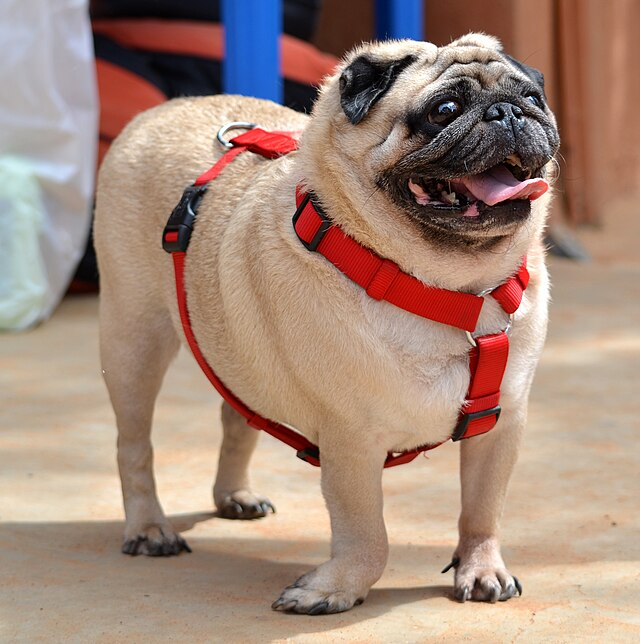

In [4]:
from PIL import Image

image = Image.open('example.jpg')
image = np.array(image)
image

In [19]:
# фильтр rgb
color_transformation_matrix = np.array([
    [1.2, 0.0, 0.0],
    [0.0, 0.8, 0.0],
    [0.0, 0.0, 0.8]
])

color_transformation_matrix

array([[1.2, 0. , 0. ],
       [0. , 0.8, 0. ],
       [0. , 0. , 0.8]])

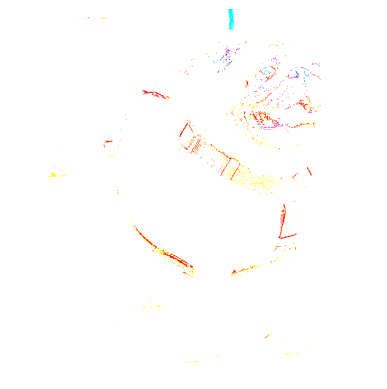

In [20]:
# матричное умножение
transformed_image = np.dot(image, color_transformation_matrix.T)

plt.axis('off')
plt.imshow(transformed_image)

In [21]:
image[0], transformed_image[0]

(array([[181, 184, 203],
        [182, 185, 204],
        [183, 186, 203],
        ...,
        [154,  98,  73],
        [152,  96,  71],
        [150,  94,  69]], dtype=uint8),
 array([[217.2, 147.2, 162.4],
        [218.4, 148. , 163.2],
        [219.6, 148.8, 162.4],
        ...,
        [184.8,  78.4,  58.4],
        [182.4,  76.8,  56.8],
        [180. ,  75.2,  55.2]]))

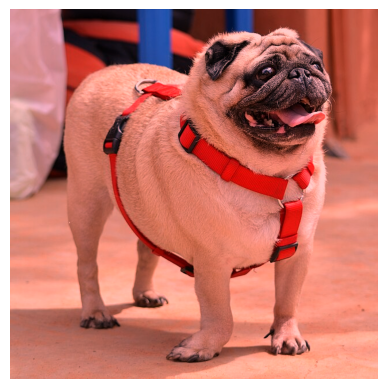

In [22]:
# клиппинг, конвертация к целочисленному виду
transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

plt.axis('off')
plt.imshow(transformed_image)

In [23]:
image[0], transformed_image[0]

(array([[181, 184, 203],
        [182, 185, 204],
        [183, 186, 203],
        ...,
        [154,  98,  73],
        [152,  96,  71],
        [150,  94,  69]], dtype=uint8),
 array([[217, 147, 162],
        [218, 148, 163],
        [219, 148, 162],
        ...,
        [184,  78,  58],
        [182,  76,  56],
        [180,  75,  55]], dtype=uint8))

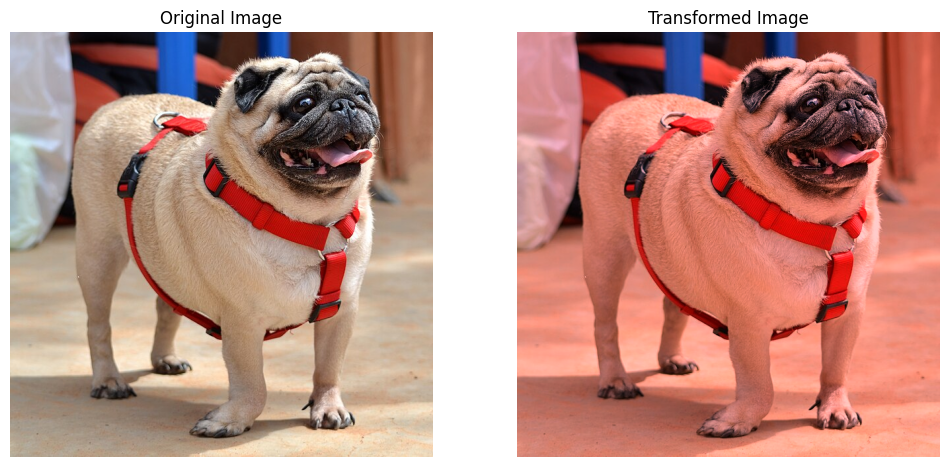

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.show()

Матричное произведение

In [25]:
# задаем 2 матрицы
matrix_a = np.array([[1, 2, 3],
                     [4, 5, 6]])

matrix_b = np.array([[6, 5, 4],
                     [3, 2, 1]]).T

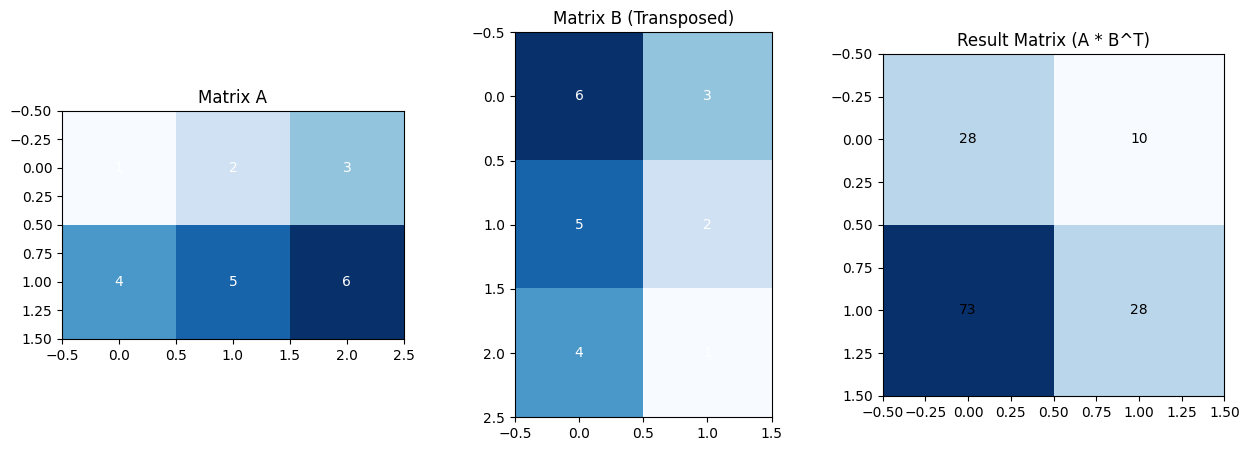

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(matrix_a, cmap='Blues', interpolation='nearest')
axes[0].set_title('Matrix A')
for i in range(matrix_a.shape[0]):
    for j in range(matrix_a.shape[1]):
        axes[0].text(j, i, str(matrix_a[i, j]), ha='center', va='center', color='white')

axes[1].imshow(matrix_b, cmap='Blues', interpolation='nearest')
axes[1].set_title('Matrix B (Transposed)')
for i in range(matrix_b.shape[0]):
    for j in range(matrix_b.shape[1]):
        axes[1].text(j, i, str(matrix_b[i, j]), ha='center', va='center', color='white')

axes[2].imshow(np.dot(matrix_a, matrix_b), cmap='Blues', interpolation='nearest')
axes[2].set_title('Result Matrix (A * B^T)')
for i in range(np.dot(matrix_a, matrix_b).shape[0]):
    for j in range(np.dot(matrix_a, matrix_b).shape[1]):
        axes[2].text(j, i, str(np.dot(matrix_a, matrix_b)[i, j]), ha='center', va='center', color='black')

plt.show()